In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import sys
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd


In [3]:

fn_ssm = 'SSM_P_STCD_20171210_S1A_IW_GRDH_1SDV_20171210T164907.nc' 
ssm_ds = xr.open_dataset(os.path.join(fn_ssm))

ssm_ds

<xarray.Dataset>
Dimensions:  (lat: 656, lon: 726)
Coordinates:
  * lat      (lat) float64 39.12 39.12 39.13 39.13 ... 42.51 42.51 42.52 42.52
  * lon      (lon) float64 14.9 14.91 14.91 14.92 ... 18.66 18.66 18.67 18.67
Data variables:
    Band1    (lat, lon) float32 ...
    crs      |S1 ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 3.1.4, released 2020/10/20
    history:      Sat Mar 19 17:07:24 2022: GDAL Create( C:\Users\ozle_\Deskt...

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

lon_name   = ssm_ds.lon[:]
lat_name   = ssm_ds.lat[:]

ssm       = ssm_ds.Band1[:]




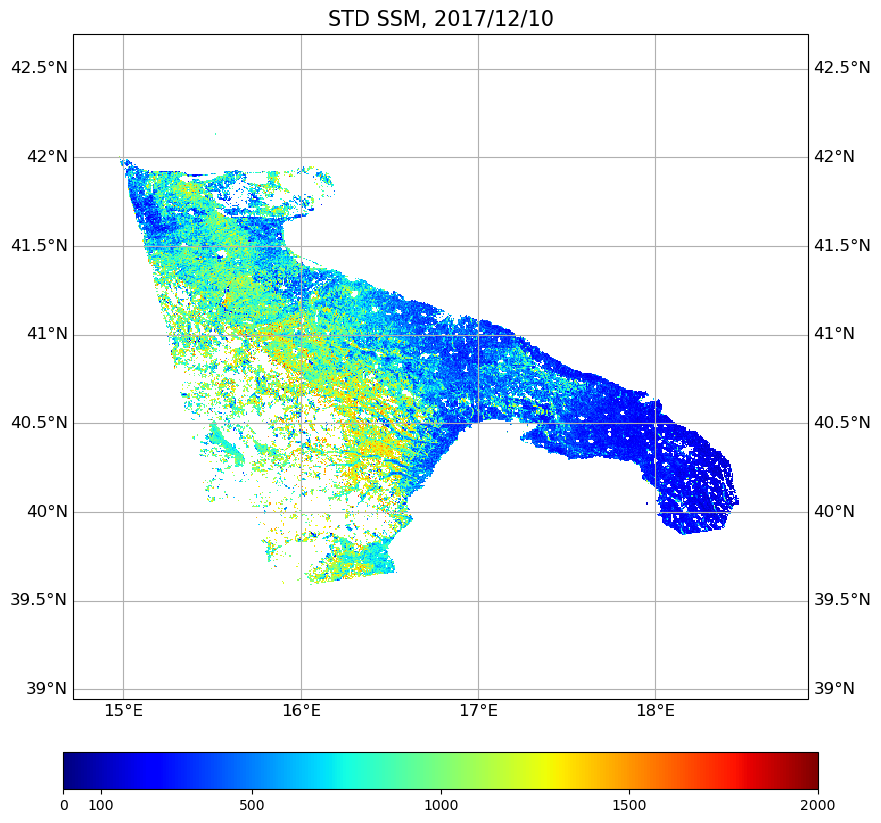

In [7]:
fig = plt.figure(figsize=(10, 10), dpi=100)

m = plt.axes(projection=ccrs.PlateCarree())
f1 = plt.pcolormesh(lon_name,lat_name,np.ma.masked_invalid(ssm), shading='flat', vmin=0, vmax=2000, cmap=plt.cm.jet)  


g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.xlabel_style = {'size': 12, 'color': 'k'}
g1.ylabel_style = {'size': 12, 'color': 'k'}


cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.05, pad=0.07, ticks=[0,100,500,1000,1500,2000]) 
cbar.ax.set_xticklabels(['0','100','500','1000','1500','2000',], fontsize=10) 
plt.title('STD SSM, 2017/12/10', fontsize=15);    

plt.savefig('SSM.png')

plt.show()

